# Section 1: imports


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json

# Section 2: import data


## Goals:

In this section we will download the data so that we can work with it. 

In [2]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/sample_meta_Home_and_Kitchen.json
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/sample_Home_and_Kitchen_5.json

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2021-11-07 20:48:16--  http://deepyeti.ucsd.edu/jianmo/amazon/sample/sample_meta_Home_and_Kitchen.json
Resolving deepyeti.ucsd.edu... 169.228.63.50
Connecting to deepyeti.ucsd.edu|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9741929 (9.3M) [application/json]
Saving to: `sample_meta_Home_and_Kitchen.json'

     0K .......... .......... .......... .......... ..........  0%  707K 13s
    50K .......... .......... .......... .......... ..........  1% 1.46M 10s
   100K .......... .......... .......... .......... ..........  1%  559M 7s
   150K .......... .......... .......... .......... ..........  2% 1.49M 6s
   200K .......... .......... .......... .......... ..........  2% 1.47M 6s
   250K .......... .......... .......... .......... ..........  3% 1.46M 6s
   300K .......... .......... .......... .......... ..........  3% 1.52M 6s
   350K ........

# Section 3: Raw Data Ingestion

## Goals:

the goal of this section is to parse the .json files for the reviews and meta data. 

In [86]:
# path to review data
path_to_reviews = r'./sample_Home_and_Kitchen_5.json'

# turn .json into list of review objects
all_parsed_data = []
with open(path_to_reviews, 'r') as review_file:
    all_data = review_file.readlines()
    all_parsed_data = [json.loads(entry) for entry in all_data]

# output 1 review to see structure
print(all_parsed_data[1])


{'overall': 5.0, 'verified': True, 'reviewTime': '04 26, 2013', 'reviewerID': 'A3H3KQLUND2L3K', 'asin': 'B00002N62Y', 'reviewerName': 'Nathan', 'reviewText': 'These belts are $2+ retail and some retailers/sellers use generic/non OEM specs sop the belts are loose...not the case with these!', 'summary': 'Great price - OEM belts!', 'unixReviewTime': 1366934400}


In [85]:
# function to set description to empty if it is missing
def parse_item_meta(item):
    item['description'] = '' if 'description' not in item else item['description'][0]
    return item

In [84]:
# path to item meta
path_to_meta = r'./sample_meta_Home_and_Kitchen.json'

# turns .json into list of item meta
all_parsed_meta_data = []
with open(path_to_meta, 'r') as review_file:
    all_data = review_file.readlines()
    all_parsed_meta_data = [json.loads(entry) for entry in all_data]
    all_parsed_meta_data = [parse_item_meta(entry) for entry in all_parsed_meta_data]

# turns the list of meta into a dataframe
meta_data = pd.DataFrame(all_parsed_meta_data)

# prints the first few samples to see structure
meta_data.head()


,category,description,title,brand,feature,rank,also_view,main_cat,price,asin,image,similar_item,also_buy,date,tech1,details
0,"[Home & Kitchen, Vacuums & Floor Care]",Eureka Replacement Vacuum Belt,Eureka 54312-12 Vacuum Cleaner Belt,Eureka,"[Limit 1 per order, Returns will not be honore...",">#1,098,930 in Home & Kitchen (See Top 100 in ...","[B004B54FM4, B014N37IBI, B00VH79FH4, B008MKNG6...",Amazon Home,$4.36,B00002N62Y,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Home & Kitchen, Vacuums & Floor Care, Vacuums...",The Mighty Mite canister vacuum is equipped wi...,Eureka Mighty Mite 3670G Corded Canister Vacuu...,Eureka,"[Ideal for Quick and Efficient Cleaning, Conve...",">#1,303 in Home & Kitchen (See Top 100 in Home...",NaN,Amazon Home,$12.97,B00002N8CX,[https://images-na.ssl-images-amazon.com/image...,"[{'asin': 'new-releases', 'href': '/gp/new-rel...",NaN,NaN,NaN,NaN
2,"[Home & Kitchen, Vacuums & Floor Care, Vacuums...",With a washable allergen filter installed on t...,Hoover U5253-900 Breathe Easy Upright Vacuum C...,Hoover,"[Washable allergen filter, Vacuums 15-inch swa...",">#12,969,577 in Home & Kitchen (See Top 100 in...",NaN,Amazon Home,NaN,B00004U9SF,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Home & Kitchen, Vacuums & Floor Care, Vacuums...",The Hoover S3639 WindTunnel Canister Vacuum Cl...,Hoover S3639 WindTunnel Canister Vacuum Cleaner,Hoover,[Full-size canister vacuum; powerful WindTunne...,">#5,056,070 in Home & Kitchen (See Top 100 in ...","[B075F44Y4C, B075F8HZS9, B075F8DZQV, B00EJQQLN...",Amazon Home,NaN,B00004U9TI,NaN,"[{'asin': '', 'href': '', 'name': 'Hoover S363...",NaN,NaN,NaN,NaN
4,"[Home & Kitchen, Vacuums & Floor Care, Vacuums...",Tool Set Includes: Crevice Tool and Squeegee P...,Orgill Hoover S1147-900 Twist & Vac Hand-Held ...,Orgill,"[Limit 1 per order, Returns will not be honore...",">#10,191,389 in Home & Kitchen (See Top 100 in...",NaN,Amazon Home,NaN,B00004WGJN,[https://images-na.ssl-images-amazon.com/image...,NaN,NaN,NaN,NaN,NaN


# Section 4: Data prep

## Goals:

The goal of this section is to take the raw data from above and put it into a dataframe we can work with. This dataframe will include the following features:

1) Product Name

        Name of the product

2) Product Price

        Price of the product. Negative if not known.

3) Product Description

        Description of the product.

4) Review Score

        Review score from 1 to 5.

5) Review Title

        Review summary; The title of the review.

6) Review Text

        The raw review text.


In [96]:
def generate_data_point_from_review( review ):

    # if we have no text for a review, skip this review
    if 'summary' not in review or 'reviewText' not in review:
        return None

    # find the item for the review
    review_item = meta_data[meta_data['asin'] == review['asin']]

    # get the price for the item
    # set it to a negative if we don't know the price
    raw_item_price = review_item['price'].unique()[0]
    raw_item_price = -1.0 if raw_item_price == np.nan else raw_item_price
    item_price = raw_item_price if type(raw_item_price) == float else float(raw_item_price.replace('$', ''))

    # return the new data point
    return {
        'product_name': review_item['title'].unique()[0],
        'product_price': item_price,
        'product_description': review_item['description'].unique()[0],
        'review_score': float(review['overall']),
        'review_title': review['summary'],
        'review_text': review['reviewText'],
    }


# get all review information
data_points = [ 
    generate_data_point_from_review(review)
    for review in all_parsed_data
 ]

# filter out Nones - these were reviews missing text
data_points = [ x for x in data_points if x ]

# turn review information into a dataframe
df = pd.DataFrame(data_points)
df.head()

,product_name,product_price,product_description,review_score,review_title,review_text
0,Eureka 54312-12 Vacuum Cleaner Belt,4.36,Eureka Replacement Vacuum Belt,4.0,Four Stars,good product and price
1,Eureka 54312-12 Vacuum Cleaner Belt,4.36,Eureka Replacement Vacuum Belt,5.0,Great price - OEM belts!,These belts are $2+ retail and some retailers/...
2,Eureka 54312-12 Vacuum Cleaner Belt,4.36,Eureka Replacement Vacuum Belt,5.0,2fer wow,These came in a 2 pk and are perfect fit for m...
3,Eureka 54312-12 Vacuum Cleaner Belt,4.36,Eureka Replacement Vacuum Belt,5.0,WOWEE!!!,"So my super fancy vacuum cleaner, the one with..."
4,Eureka 54312-12 Vacuum Cleaner Belt,4.36,Eureka Replacement Vacuum Belt,4.0,Four Stars,Right one for my eureka.


# Data Exploration

## Product Rating Hist

how are the product reviews spread out? 

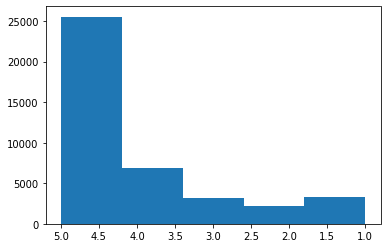

In [95]:
%matplotlib inline
fig, ax = plt.subplots()

ax.hist(df['review_score'], bins=len(df['review_score'].unique()))
ax.invert_xaxis()

plt.show()
